In [140]:
import requests
import os
import urllib.request
import urllib.parse
from urllib.error import HTTPError,URLError
from bs4 import BeautifulSoup
import json
import pandas as pd
from matplotlib import pyplot as plt

In [141]:
import requests

url = "https://coronavirus-monitor.p.rapidapi.com/coronavirus/cases_by_country.php"

headers = {
    'x-rapidapi-host': "coronavirus-monitor.p.rapidapi.com",
    'x-rapidapi-key': "8d6d65efacmsh760b1c4f8f3fe69p1c37c7jsnf5f331135136"
    }

response = requests.request("GET", url, headers=headers)

response_content = response.content.decode(response.encoding)
response_json = json.loads(response_content)

In [142]:
country_data_dict = {'country_name':[],
  'cases':[],
  'deaths':[],
  'region':[],
  'total_recovered':[],
  'new_deaths':[],
  'new_cases':[],
  'serious_critical':[],
  'active_cases':[],
  'total_cases_per_1m_population':[],
  'deaths_per_1m_population':[],
  'total_tests':[],
  'tests_per_1m_population':[]}

In [143]:
cntry_stats_list = response_json['countries_stat']

In [144]:
#Formatting data into Readable format
for cntry_stats in cntry_stats_list:
    for k,v in cntry_stats.items():
        country_data_dict[k].append(v)
        

In [145]:
ctry_df = pd.DataFrame(country_data_dict)

In [146]:
ctry_df

,country_name,cases,deaths,region,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
0,USA,"1,507,773","90,113",,"339,232",0,0,"16,248","1,078,428","4,558",272,"11,949,625","36,127"
1,Spain,"276,505","27,563",,"192,253",0,0,"1,208","56,689","5,914",590,"3,037,840","64,977"
2,Russia,"272,043","2,537",,"63,166",0,0,"2,300","206,340","1,864",17,"6,656,340","45,614"
3,UK,"240,161","34,466",,N/A,0,0,"1,559",N/A,"3,540",508,"2,489,563","36,696"
4,Brazil,"233,511","15,662",,"89,672",29,369,"8,318","128,177","1,100",74,"735,224","3,462"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,Western Sahara,6,0,,6,0,0,0,0,10,0,0,0
211,Anguilla,3,0,,3,0,0,0,0,200,0,0,0
212,Lesotho,1,0,,0,0,0,0,1,0.5,0,0,0
213,Saint Pierre Miquelon,1,0,,1,0,0,0,0,173,0,0,0


In [147]:
ctry_df_1 = ctry_df.drop('region',axis=1)

In [148]:
def getNumFromString(str_num):
    strnew = str_num.replace(',','')
    if (strnew == '') or (strnew == 'N/A'):
        return 0
    else:
        return float(strnew)
#ctry_df_1['cases'] = ctry_df_1['cases'].astype('int')
# for col in ctry_df_1.columns:
#     print(col)
#     ctry_df_1[col] = ctry_df_1[col].cast('int')

In [149]:
getNumFromString('74,345')

74345.0

In [150]:
cols = ctry_df_1.columns

In [151]:
#Fixing value type
for col in cols:
    if col != 'country_name':
        ctry_df_1[col] = ctry_df_1[col].apply(getNumFromString)

In [152]:
ctry_df_1

,country_name,cases,deaths,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
0,USA,1507773.0,90113.0,339232.0,0.0,0.0,16248.0,1078428.0,4558.0,272.0,11949625.0,36127.0
1,Spain,276505.0,27563.0,192253.0,0.0,0.0,1208.0,56689.0,5914.0,590.0,3037840.0,64977.0
2,Russia,272043.0,2537.0,63166.0,0.0,0.0,2300.0,206340.0,1864.0,17.0,6656340.0,45614.0
3,UK,240161.0,34466.0,0.0,0.0,0.0,1559.0,0.0,3540.0,508.0,2489563.0,36696.0
4,Brazil,233511.0,15662.0,89672.0,29.0,369.0,8318.0,128177.0,1100.0,74.0,735224.0,3462.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,Western Sahara,6.0,0.0,6.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
211,Anguilla,3.0,0.0,3.0,0.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0
212,Lesotho,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.0
213,Saint Pierre Miquelon,1.0,0.0,1.0,0.0,0.0,0.0,0.0,173.0,0.0,0.0,0.0


In [153]:
len(cols)

12

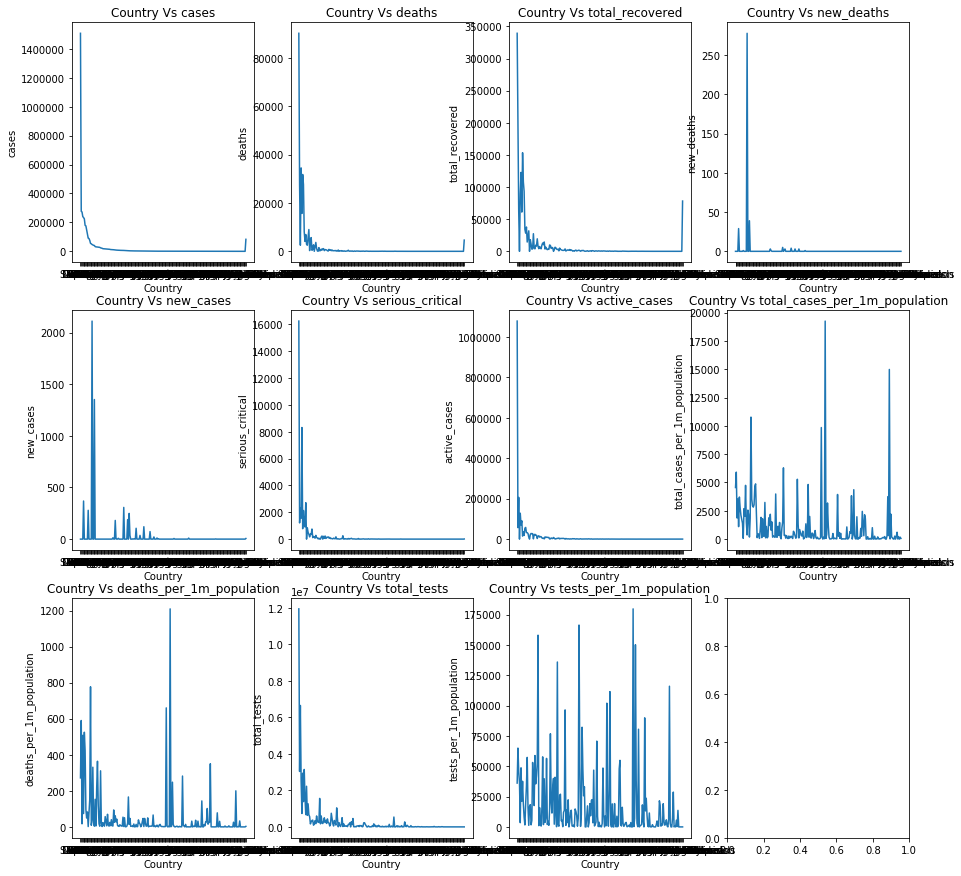

In [154]:
#Looking for outlier:
fig,ax = plt.subplots(3,4,figsize=(15,15))
col_in = 1
for i in range(3):
    for j in range(4):
        if col_in != 12:
            ax[i][j].plot(ctry_df_1['country_name'],ctry_df_1[cols[col_in]])
            ax[i][j].set_title("Country Vs {}".format(cols[col_in]))
            ax[i][j].set_xlabel("Country")
            ax[i][j].set_ylabel(cols[col_in])
            col_in =col_in + 1


In [155]:
ctry_df_1.describe()

,cases,deaths,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
count,2.150000e+02,215.000000,215.000000,215.000000,215.000000,215.000000,2.150000e+02,215.000000,215.000000,2.150000e+02,215.000000
mean,2.196515e+04,1457.083721,8431.883721,1.725581,25.572093,208.525581,1.094179e+04,1084.899535,48.458186,2.733744e+05,18356.869767
std,1.109886e+05,7491.029145,32494.270478,19.224061,175.894731,1279.466024,7.581051e+04,2230.228883,137.422834,1.029466e+06,31199.365915
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,1.195000e+02,2.000000,36.000000,0.000000,0.000000,0.000000,1.950000e+01,55.000000,0.400000,1.420500e+03,610.000000
50%,8.530000e+02,18.000000,311.000000,0.000000,0.000000,2.000000,2.920000e+02,216.000000,4.000000,1.710600e+04,4568.000000
75%,6.744000e+03,163.500000,2661.500000,0.000000,0.000000,21.500000,2.318000e+03,1219.000000,26.000000,1.677025e+05,19609.000000
max,1.507773e+06,90113.000000,339232.000000,278.000000,2112.000000,16248.000000,1.078428e+06,19250.000000,1209.000000,1.194962e+07,179750.000000


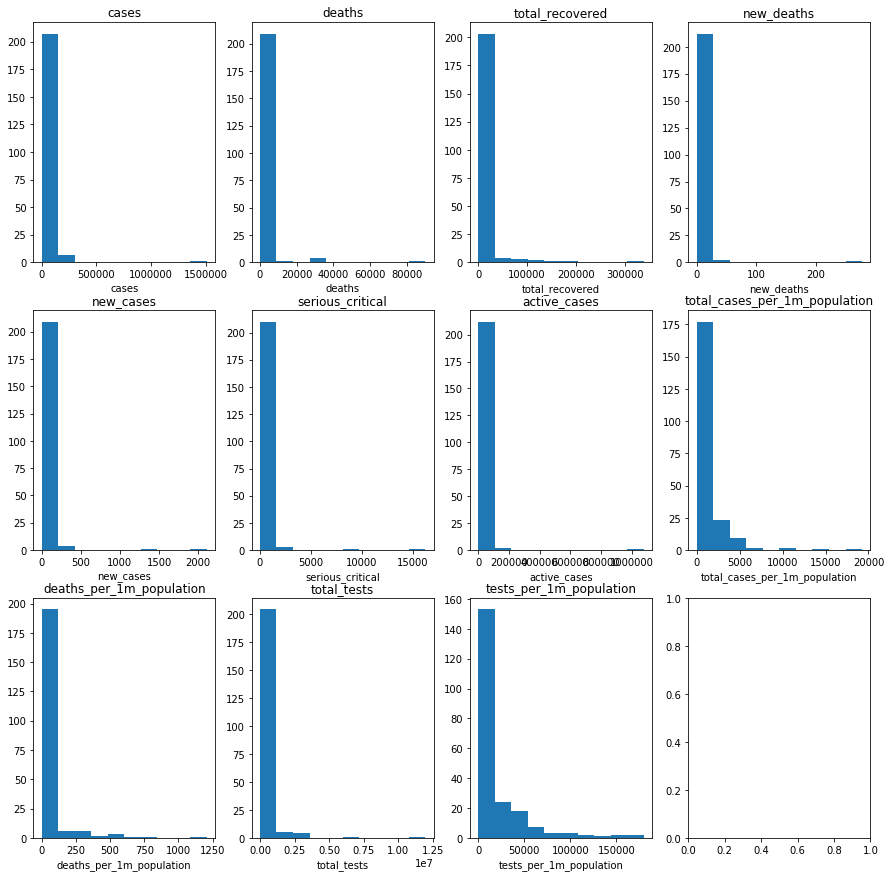

In [156]:
fig,ax = plt.subplots(3,4,figsize=(15,15))
col_in = 1
for i in range(3):
    for j in range(4):
        if col_in != 12:
            ax[i][j].hist(ctry_df_1[cols[col_in]])
            ax[i][j].set_title("{}".format(cols[col_in]))
            ax[i][j].set_xlabel(cols[col_in])
            #ax[i][j].set_ylabel(cols[col_in])
            col_in =col_in + 1

In [157]:
from statsmodels.graphics.gofplots import qqplot


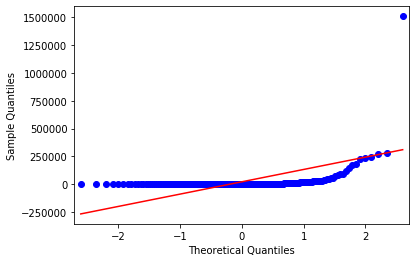

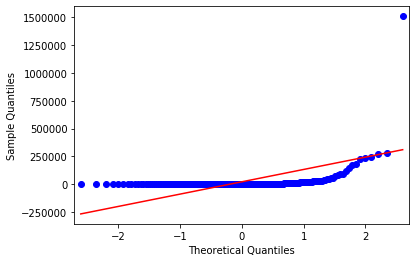

In [160]:
qqplot(ctry_df_1['cases'],line='s')

Numbe of cases are not normally distributed.

In [167]:
pd.set_option("display.max_rows",1000)
ctry_df_1.groupby(by='cases').count()

,country_name,deaths,total_recovered,new_deaths,new_cases,serious_critical,active_cases,total_cases_per_1m_population,deaths_per_1m_population,total_tests,tests_per_1m_population
cases,,,,,,,,,,,
1.0,2,2,2,2,2,2,2,2,2,2,2
3.0,1,1,1,1,1,1,1,1,1,1,1
6.0,3,3,3,3,3,3,3,3,3,3,3
8.0,2,2,2,2,2,2,2,2,2,2,2
9.0,1,1,1,1,1,1,1,1,1,1,1
10.0,1,1,1,1,1,1,1,1,1,1,1
11.0,4,4,4,4,4,4,4,4,4,4,4
12.0,2,2,2,2,2,2,2,2,2,2,2
13.0,1,1,1,1,1,1,1,1,1,1,1
